In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# RandomForest

Recall that we studied `RandomForest` in our previous discussion as an ensemble approach, utilizing bagging and  random-spaces. The forest refers to the multitude to tree estimators.

As before, let us start with some utility functions that will help  us summarize and visualize the data.

#### Utility functions

In [2]:
from typing import List
from itertools import cycle
cycol = cycle('bgrcmk')

def scatterplot(index, data, ax) -> None:
    """
    A helper function to plot the 2-D data. 
    It presumes the features are 'x1' & 'x2'
    """
    ax.scatter(data['x'],   # as the x-axis 
            data['y'],   # as the y-axis
            s=100, # size
            alpha=0.5, #opacity/transparency
            c=next(cycol) # pick a different color
            )
    ax.set_xlabel (r"$x$", fontsize=25)
    ax.set_ylabel(r"$y$", fontsize=25)
    title =  f'Scatterplot of univariate-{index}'
    ax.set_title(title, fontsize=30)

def load_regression_datasets () -> List[pd.DataFrame]:
    datasets = []
    for i in range(1,4):
        file = f"https://raw.githubusercontent.com/supportvectors/ml-100/master/univariate-{i}.csv"
        data = pd.read_csv(file)
        data = data.dropna()
        datasets.append(data)
    return datasets

def display_data_summary(data:pd.DataFrame, index:int) -> None:
    display(HTML (f'<h4 style="text-align:center">DATASET: univariate-{index}</h4>'))
    html = data.describe(include='all').transpose().to_html()
    display(HTML(html))
    


#### Load, summarize & visualize the data.

In [3]:
from IPython.display import Markdown, HTML
datasets = load_regression_datasets()

for index, data in enumerate(datasets):
    display_data_summary(data, index)   

,count,mean,std,min,25%,50%,75%,max
x,1000.0,5.000000,2.891085,0.000000,2.500000,5.000000,7.500000,10.000000
y,1000.0,41.366271,24.704582,-11.416569,20.524133,41.872787,62.042398,92.182776


,count,mean,std,min,25%,50%,75%,max
x,1000.0,5.00000,2.891085,0.000000,2.500000,5.000000,7.500000,10.000000
y,1000.0,1.84601,7.440305,-17.343996,-4.075161,3.037892,7.935082,17.459383


,count,mean,std,min,25%,50%,75%,max
x,1000.0,5.000000,2.891085,0.000000,2.500000,5.000000,7.500000,10.000000
y,1000.0,35.139028,31.446307,-11.643464,9.620289,19.761214,62.698243,102.949634


### Visualize the three datasets

Let us remind ourselves of these old friends from our previous labs through a quick visualization.

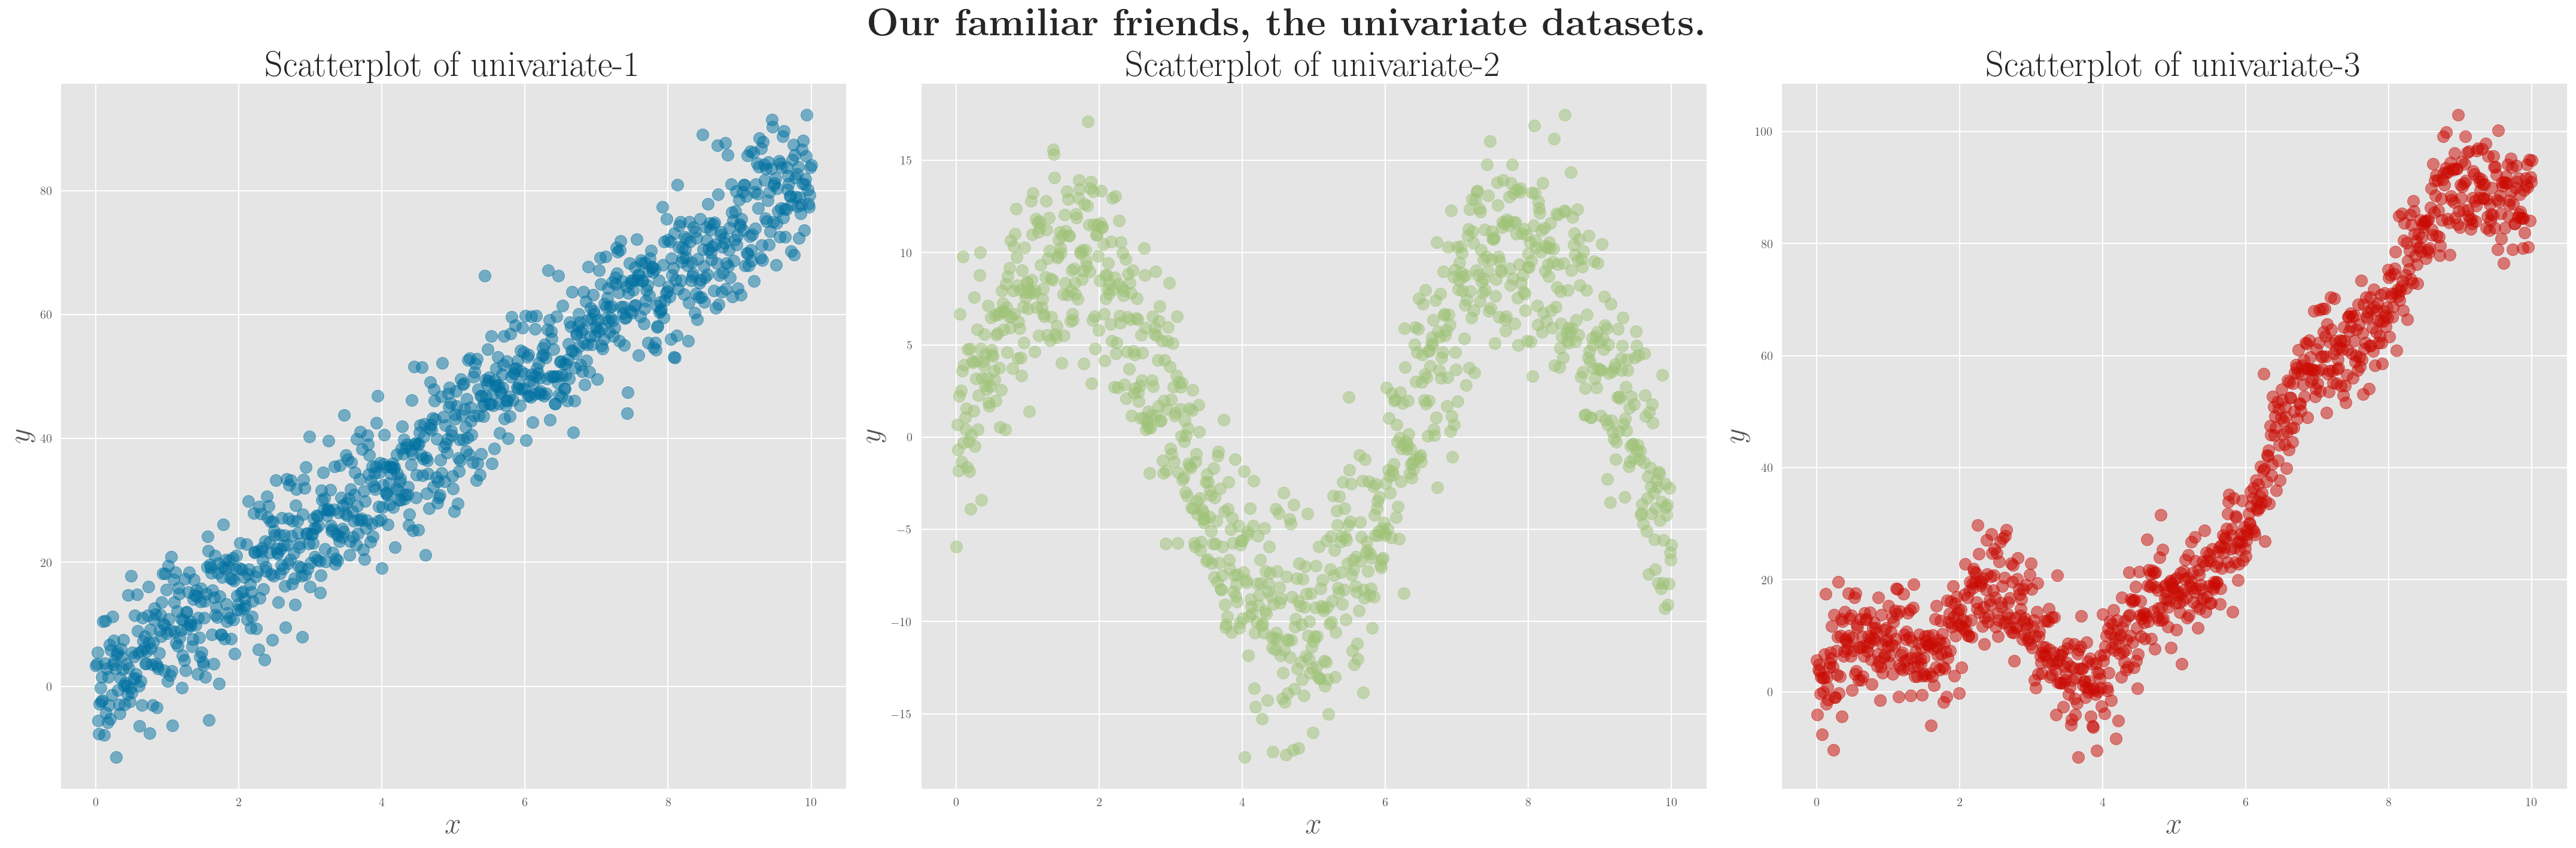

In [4]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
for i, data in enumerate(datasets):
    scatterplot (i+1, data, ax[i])

plt.suptitle(r'\textbf{Our familiar friends, the univariate datasets.}', fontsize=32)    
plt.tight_layout()

### Decision Tree Regressor

Let us now try the decision tree algorithm for creating a regressor.

Mean squared error: 34.55
Coefficient of Determination (R^2):0.9399
[1.]


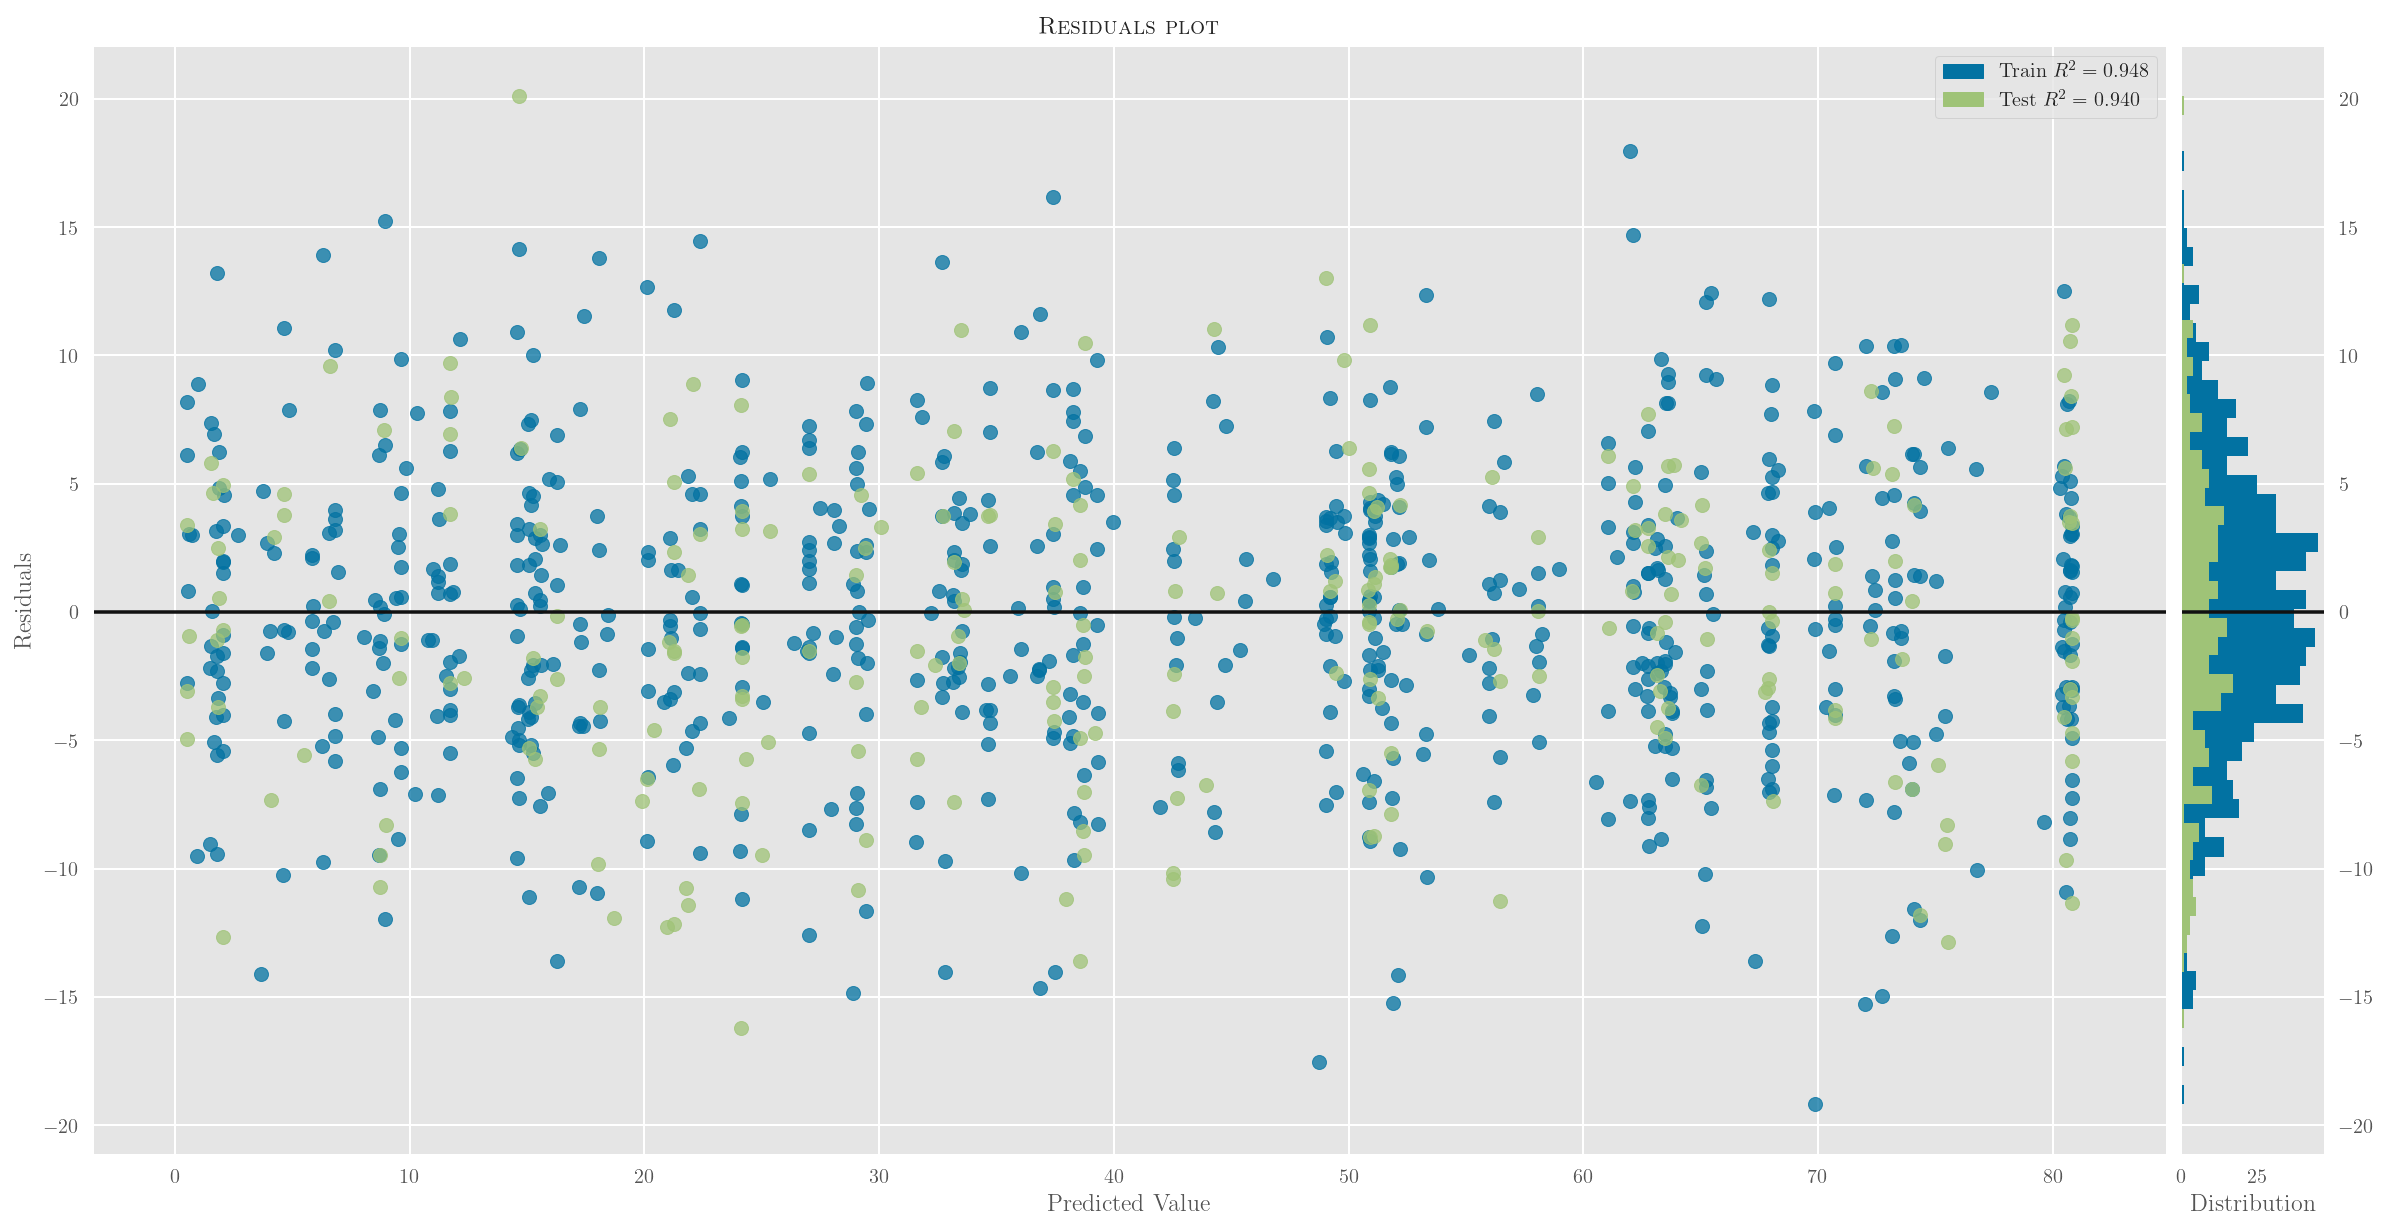

Mean squared error: 10.26
Coefficient of Determination (R^2):0.8173
[1.]


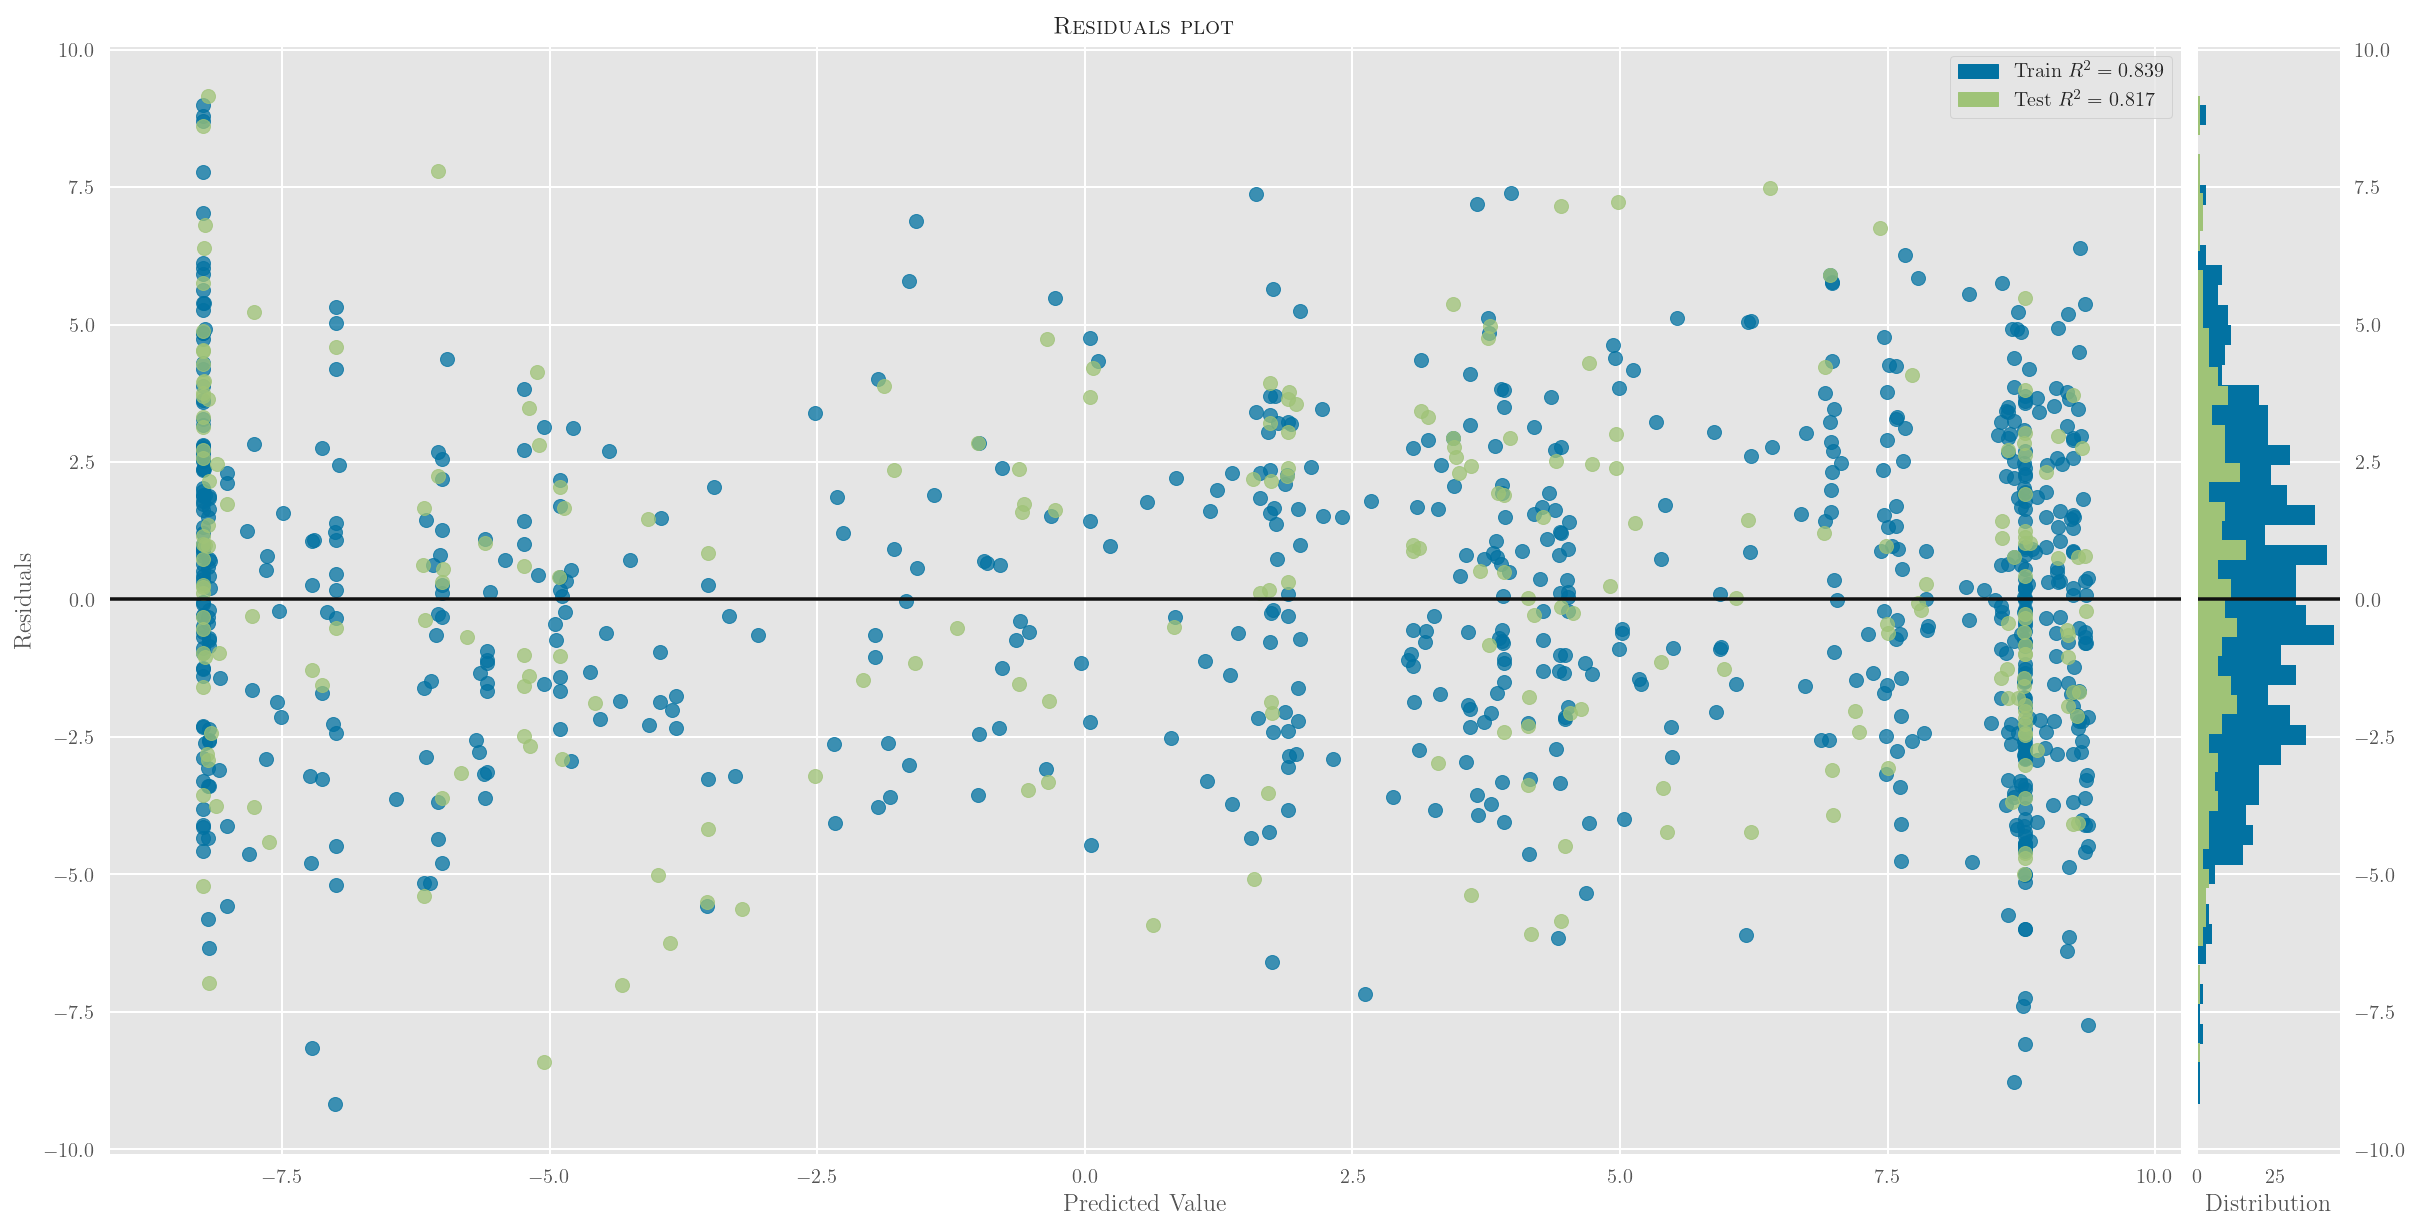

Mean squared error: 25.66
Coefficient of Determination (R^2):0.9745
[1.]


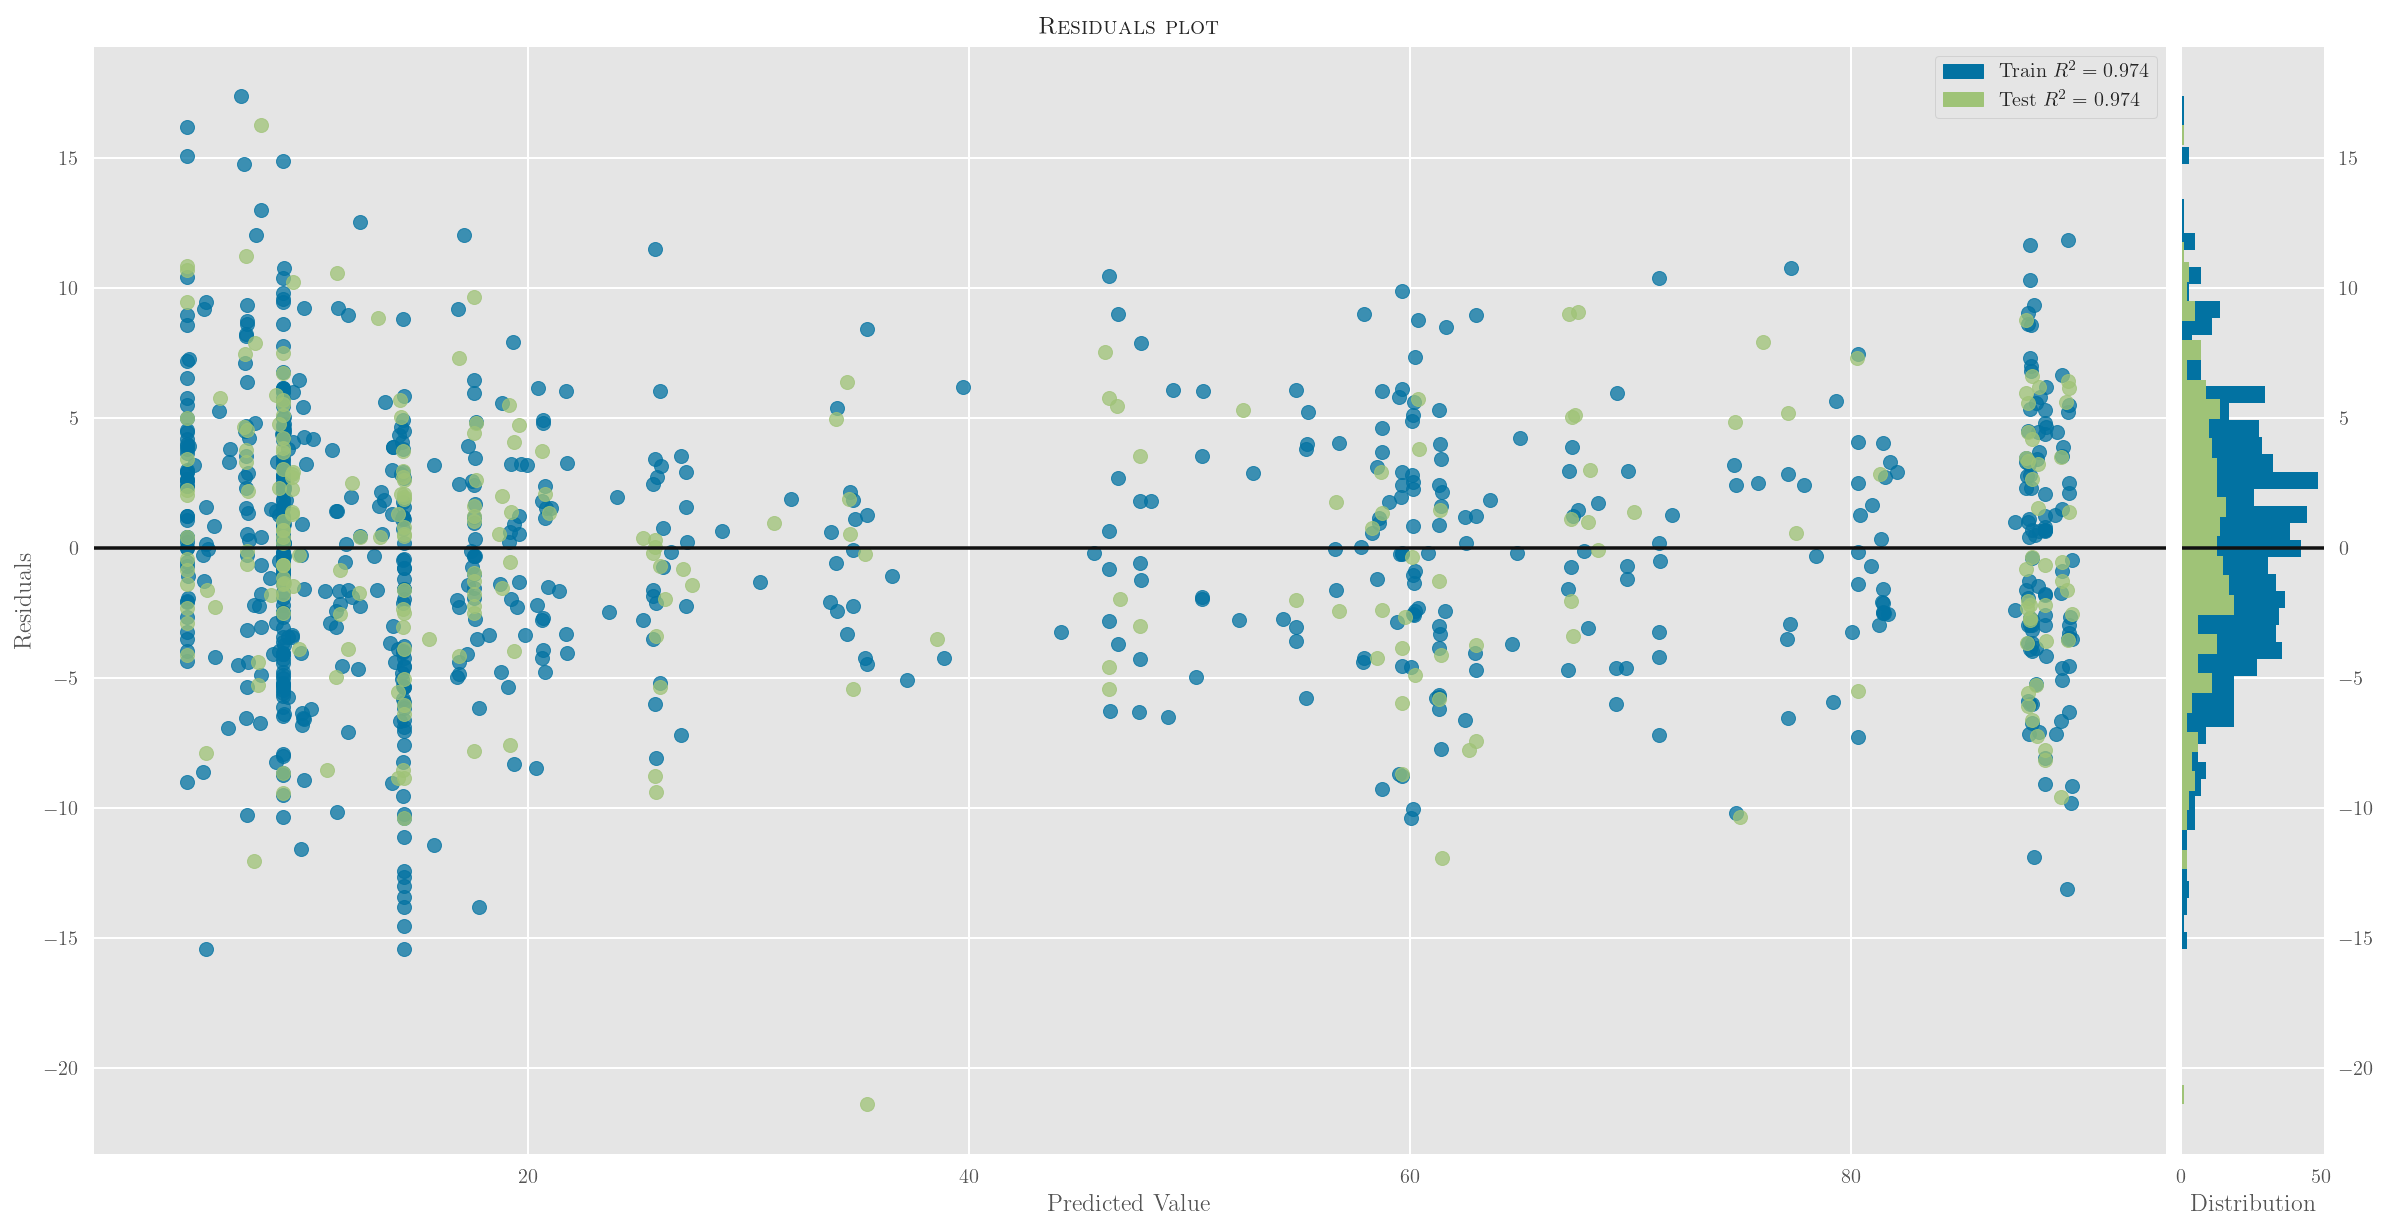

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz  
from yellowbrick.regressor import residuals_plot



forests = []
for index, data in enumerate(datasets):
    X, y = data[['x']], data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    forest = RandomForestRegressor(n_estimators = 1000, 
                                      n_jobs = 20, 
                                      max_depth=4,
                                      random_state = 42).fit(X_train, y_train)
    ŷ = forest.predict(X_test)
    name = f'Univariate-{index + 1}'
    forests.append(forest)
    
    
    display(HTML(f'<h4 style="text-align:center">Random-Forest Regressor for {name}</h4>'))
    # Check how good are the predictions?
    mse         = mean_squared_error(y_test, ŷ)
    print(f"Mean squared error: {mse:.2f}")
    r2 = r2_score(y_test, ŷ)
    print(rf"Coefficient of Determination (R^2):{r2:0.4f}")
    
    
    plt.rcParams[ 'figure.figsize' ] = '20,10'               # landscape format figures
    viz = residuals_plot(forest, X_train, y_train, X_test, y_test, 
                         title=r'\textsc{\large Residuals plot}')
    

    

### Display the model predictions on the data

As the final step, let us display the model predictions to check for its fidelity in capturing the essential relationship of the features.

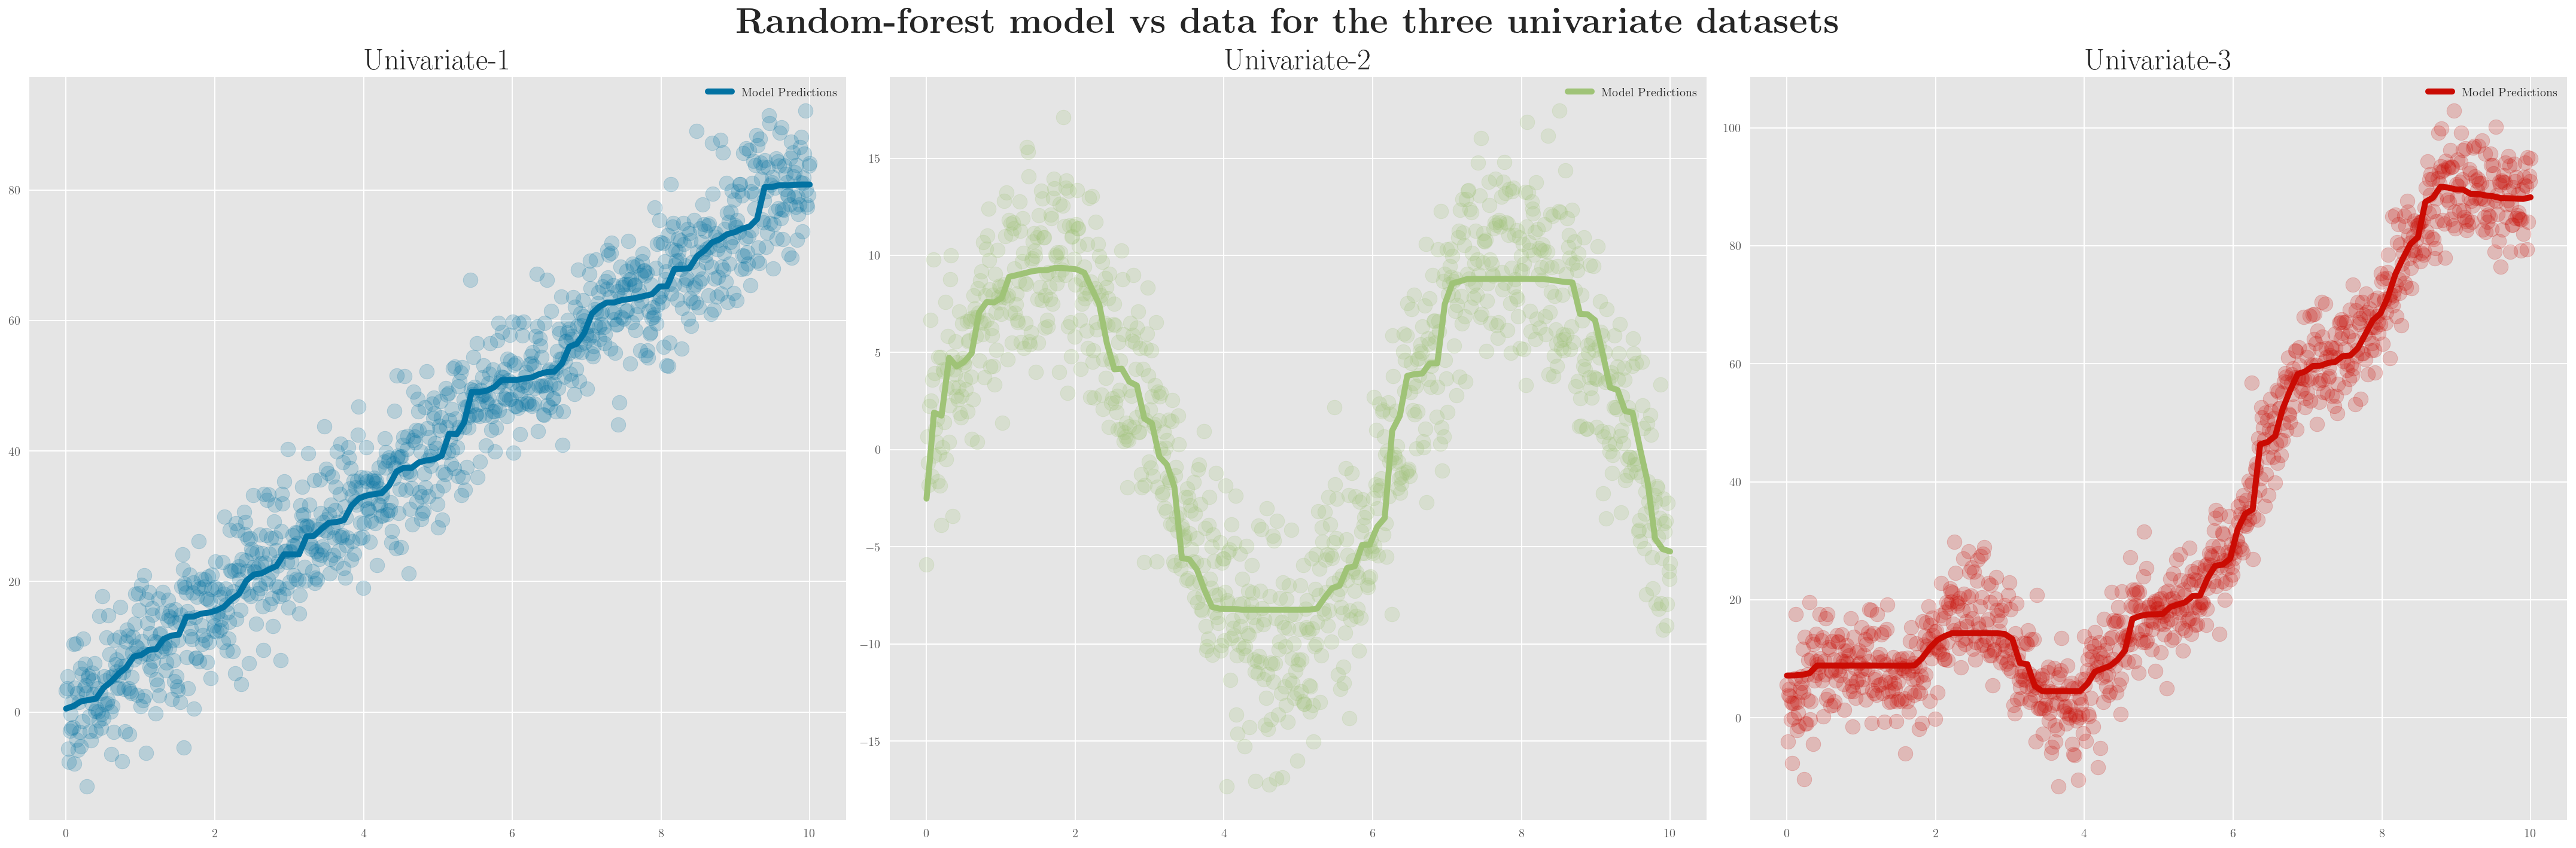

In [18]:
cycol = cycle('bgrcmk')
fig, ax = plt.subplots(1,3, figsize=(30,10))
for index, (data,forest) in enumerate(zip(datasets, forests)):
    xx = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 100)}) 
    yy = forest.predict(xx)
    color = next(cycol)
    ax[index].scatter(data['x'], data['y'], alpha=0.2, s=150, c=color)
    ax[index].plot(xx, yy , c=color, label="Model Predictions", linewidth=5)
    ax[index].legend(loc='best');
    ax[index].set_title(f'Univariate-{index+1}', fontsize=25)
plt.suptitle(r'\textbf{Random-forest model vs data for the three univariate datasets}', fontsize=30)
plt.tight_layout()

**Observation** Clearly, though these forests are overfitting models for our situation, but they represent a vast improvement over the decision tree models we encountered in our previous lab.

#### Homework

* Play with `max_depth` -- increase and decrease its value, and see what happens.
* Play with `criterion` and see if and how it affects your models
* Play with `min_samples_split` and `min_samples_split` in a similar manner.

### Plotting the decision trees

Let us now plot the three decision tree models.

**Caution**: This can take quite some time to render, so be patient!

In [19]:
from sklearn.tree import plot_tree
for index, tree in enumerate(trees):
    name = f'Univariate-{index + 1}'
    display(HTML(f'<h4 style="text-align:center">Decision tree visualization for {name}</h4>'))
    plot_tree(tree);
    plt.show();


NameError: name 'trees' is not defined